## Introduction

`Name  : Ari Riscahyo Nugroho`

`Batch : 007`

`Github: Ari2109`

This notebook refers to the dataset given here: https://www.kaggle.com/blastchar/telco-customer-churn

The aim for this notebook is to predict whether a customer is categorized as churn or not in a telco company, based on the characteristics of the customers with the company 

The model used here is a simple neural network architecture

## Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, LabelEncoder
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import tensorflow as tf
from sklearn.metrics import classification_report

## EDA

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/Ari2109/data_repo/main/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2274,0320-JDNQG,Male,0,Yes,Yes,23,Yes,No,Fiber optic,Yes,No,No,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,99.85,2331.3,Yes
928,0862-PRCBS,Female,0,Yes,Yes,68,Yes,Yes,Fiber optic,No,Yes,No,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),103.75,7039.45,No
5194,1902-XBTFB,Male,0,No,Yes,22,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,No,Month-to-month,Yes,Electronic check,89.40,2001.5,Yes
3289,9626-VFRGG,Female,0,No,Yes,41,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Bank transfer (automatic),88.50,3645.05,No
2224,2528-HFYZX,Male,1,Yes,No,17,Yes,No,Fiber optic,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,76.45,1233.4,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


No Null data, but it's weird to see TotalCharges is object datatype. Let's change that to float

In [5]:
df['TotalCharges']

0         29.85
1        1889.5
2        108.15
3       1840.75
4        151.65
         ...   
7038     1990.5
7039     7362.9
7040     346.45
7041      306.6
7042     6844.5
Name: TotalCharges, Length: 7043, dtype: object

In [6]:
df2=df.copy()
df2['TotalCharges']=pd.to_numeric(df['TotalCharges'],errors='coerce')


Is there any problem with us converting the TotalCharges? Let's check

In [7]:
df2[df2['TotalCharges'].isnull()] 

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


There's null data after we force-convert the TotalCharge. As there's only a little null data, we'll drop them immediately

In [8]:
df2.dropna(inplace=True)

In [9]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


Now all data seems logically correct. Let's continue with the next EDA

In [10]:
df2.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


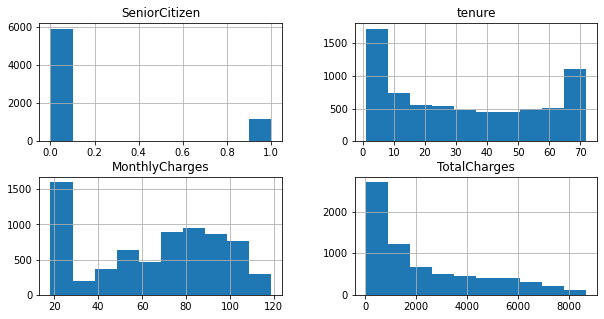

In [11]:
df2.hist(figsize=(10,5))
plt.show()

The data distribution is mostly skewed

Now let's see the data of Monthly Charge 

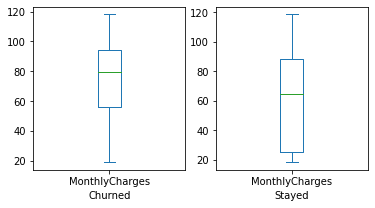

In [12]:
fig1, axes1 = plt.subplots(1,2, figsize=(6,3)) 
plt.subplot(1,2,1)
plt.xlabel('Churned')
df2[df2['Churn'] == 'Yes']['MonthlyCharges'].plot(kind='box')
plt.subplot(1,2,2)
plt.xlabel('Stayed')
df2[df2['Churn'] == 'No']['MonthlyCharges'].plot(kind='box')
plt.show()

The central point of our churned customer is higher than the staying customer. This could be meant that customers aren't quite happy with the price charged per month. 

Do note that this is not necessarily a causation, though it's worth to investigate. The 'lower charges' on customer whom stays might be the one loyal customer who didn't pick up internet service and thus making the price lower

Next we'll see how long our churned customers are staying before, and how long our currently stayed customer have been subscribed 

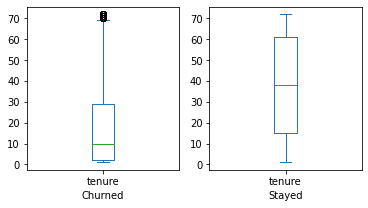

In [13]:
fig1, axes1 = plt.subplots(1,2, figsize=(6,3)) 
plt.subplot(1,2,1)
plt.xlabel('Churned')
df2[df2['Churn'] == 'Yes']['tenure'].plot(kind='box')
plt.subplot(1,2,2)
plt.xlabel('Stayed')
df2[df2['Churn'] == 'No']['tenure'].plot(kind='box')
plt.show()

Most of our churned customer left after less than 30 months. Our staying customers have been subscribed for mostly 20-60 months

Next, we'll drop customer ID, then visualize the categorical data

In [14]:
df_nid = df2.drop(columns='customerID')
df_nid_cat = df_nid.drop(columns=['tenure', 'MonthlyCharges', 'TotalCharges'])
#df_nid_cat

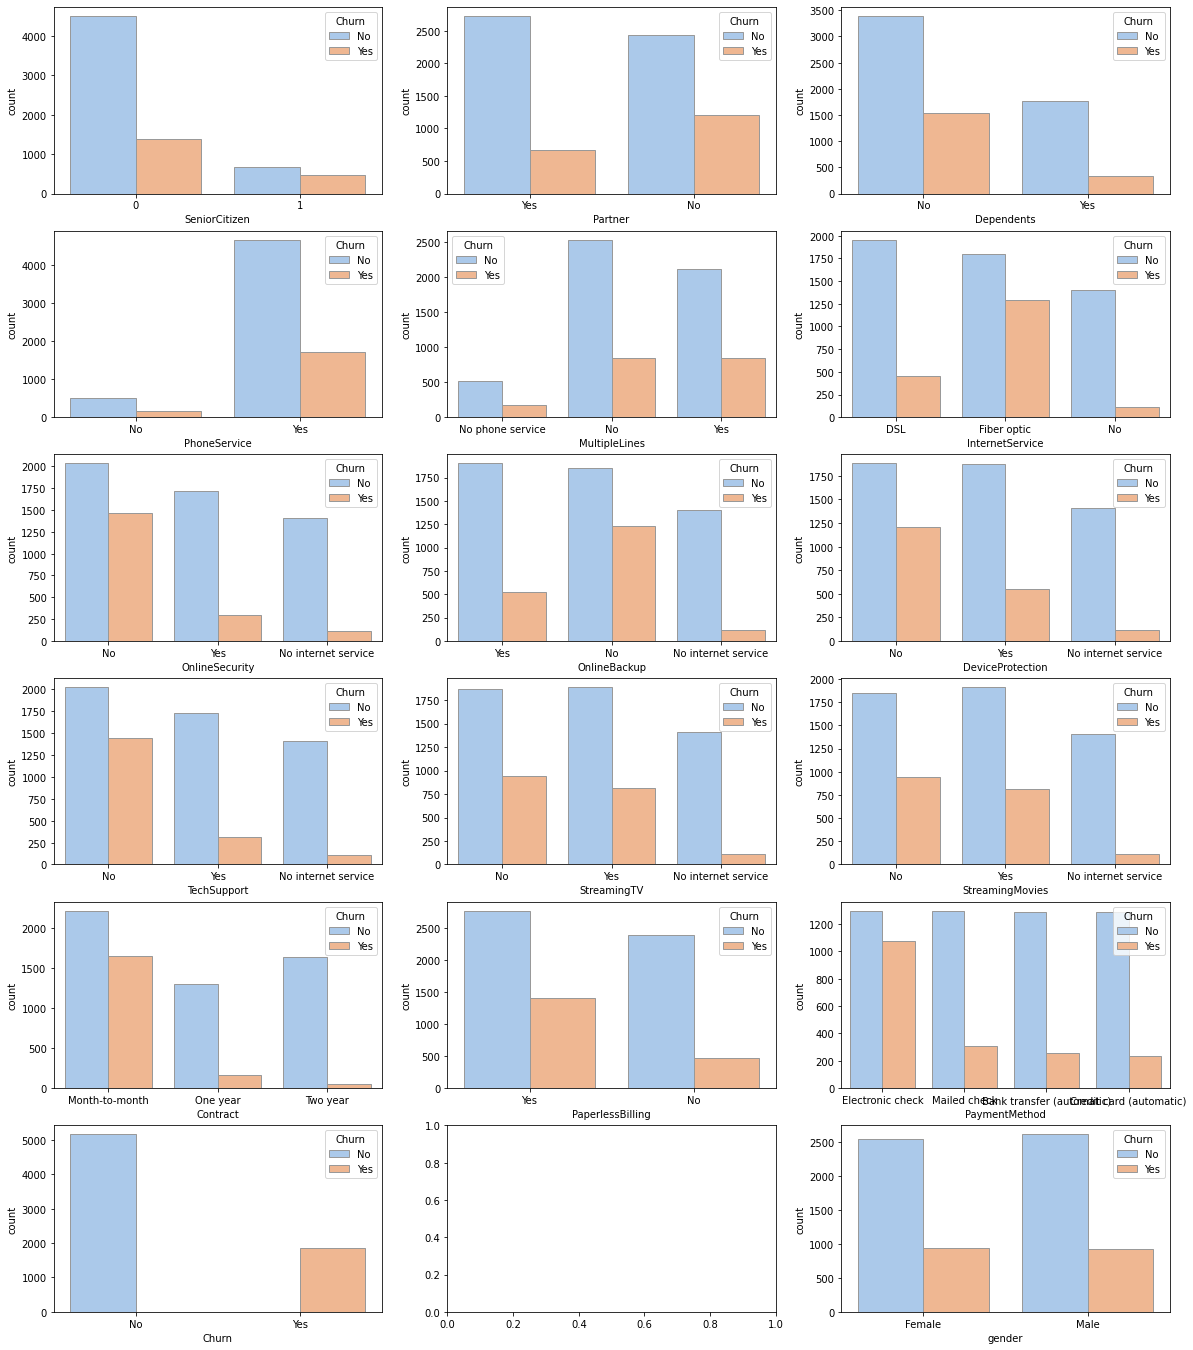

In [15]:
n=len(df_nid_cat.columns)
fig, axes = plt.subplots(6,3, figsize=(20,24)) 
for i, col in enumerate(df_nid_cat.columns):
    #plt.figure(i)
    sns.countplot(x=col, hue="Churn",
              palette="pastel", edgecolor=".6",
              data=df_nid_cat)
    plt.subplot(6,3,i+1)

According to the diagram, these are the customers that are churned (note: it doesn't directly imply causation, but worth to investigate):
1. Have Fiber Optic internet service
2. Subscribe in month-to-month contract
3. Have no Tech Support to help (unclear if this meant that customer didn't have anyone that is tech-savvy, or simply if the customer never contacted tech support)
4. Have no Online Security 
5. Have no Online Backup
6. Have no Device Protection
7. Single or Lives alone 
8. Paying via Electronic Check

Also from the diagram, we can see that gender is having no effect on determining the churned customer

## Train-Test Split, Train Data Exploratory, 'Pipeline' Definition

In [16]:
X = df_nid.drop(columns='Churn')
y = df_nid['Churn']

Since we are using neural network, string label doesn't work here. We'll take 'Churned'/'Yes' as positive [1] and 'Stayed'/'No' as negative [0]

In [17]:
le = LabelEncoder()
le.fit(['No', 'Yes'])
y = le.transform(y)
#y

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state=42)

In [19]:
ohe = OneHotEncoder(handle_unknown='ignore')
minmax = MinMaxScaler()

In [20]:
telco_num = X_train.select_dtypes(include=[np.number])
telco_cat = X_train.drop(columns=telco_num.columns.tolist())

In [21]:
num_pipeline = Pipeline([
            ("minmax", minmax)
])

In [22]:
cat_pipeline = Pipeline([
            ("one-hot", ohe)
])

In [23]:
num_attribs = list(telco_num)
cat_attribs = list(telco_cat)

full_prep = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", cat_pipeline, cat_attribs),
    ])

train_prepared = full_prep.fit_transform(X_train)
val_prepared = full_prep.transform(X_val)
test_prepared = full_prep.transform(X_test)

In [24]:
train_tensor = tf.data.Dataset.from_tensor_slices((train_prepared, y_train))

train_batches = train_tensor.shuffle(100).batch(32) 

## Basic NN

Before we continue with the modelling, note that we are focusing on the churned customer (1 / Positive Class). We don't want to falsely predict (F) a churned customer as stayed customer (N), as getting customer back / getting new customer is more costly rather than try to retain the existing customer

As such, we'll focus on Recall value on the Churn prediction 

### Sequential API

We'll do basic neural network architecture with 1 hidden layer containing 16 nodes using ReLU activation, with 1 output layer using sigmoid activation. First we try the Sequential API 

In [25]:
%%time
# basic NN
model = Sequential()
model.add(Dense(8, activation='relu', input_shape=(45,))) # hidden layer
model.add(Dense(1, activation='sigmoid'))

# compile
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# train
history_base = model.fit(train_batches, epochs=100, validation_data=(val_prepared, y_val), verbose=0)

CPU times: user 47.5 s, sys: 3.71 s, total: 51.2 s
Wall time: 59 s


Next we visualize the loss and val_loss progress per epoch

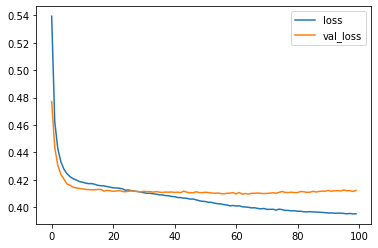

In [26]:
metrics = pd.DataFrame(history_base.history)
metrics[['loss', 'val_loss']].plot()

The model seems to do good, both loss and val_loss are convergent. Both losses is still around 0.4 tho, so we see if we can do something better 

### Functional API

Next we'll try the Functional API. Note that this is not into model improvement yet, just another way to do it

In [27]:
%%time
input_data = Input(shape=(45,))
hidden_1 = Dense(8, activation='relu')(input_data)
output = Dense(1, activation='sigmoid')(hidden_1)

model = Model(inputs=input_data, outputs=output)
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# train
history_base = model.fit(train_batches, epochs=100, validation_data=(val_prepared, y_val), verbose=0)

CPU times: user 45.4 s, sys: 3.5 s, total: 48.9 s
Wall time: 51 s


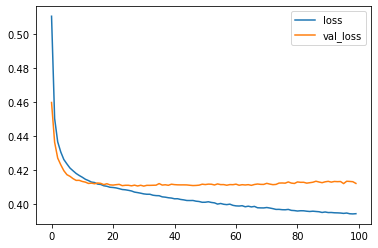

In [28]:
metrics = pd.DataFrame(history_base.history)
metrics[['loss', 'val_loss']].plot()

In [29]:
y_pred = model.predict(test_prepared)
y_pred[y_pred < 0.5] = 0
y_pred[y_pred >= 0.5] = 1
y_pred = y_pred.squeeze()

In [30]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.63      0.51      0.56       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407



The recall here is 0.51, which is just slightly better than a coinflip, with the F1 macro of 0.71.

## Model Improvement Trial-and-Error

First, we'll try adding extra layer on the model

In [31]:
%%time
# basic NN
model = Sequential()
model.add(Dense(8, activation='relu', input_shape=(45,))) # hidden layer
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# compile
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# train
history_layer = model.fit(train_batches, epochs=100, validation_data=(val_prepared, y_val), verbose=0)

CPU times: user 47.1 s, sys: 3.46 s, total: 50.6 s
Wall time: 51.3 s


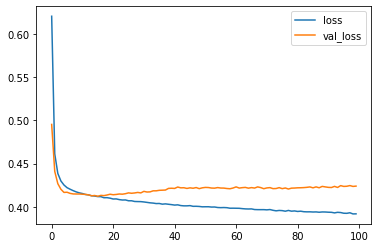

In [32]:
metrics = pd.DataFrame(history_layer.history)
metrics[['loss', 'val_loss']].plot()

Adding layer doesn't quite afecting anything. We'll try different way

This time, we'll change the optimizer to NAdam

In [33]:
%%time
model = Sequential()
model.add(Dense(8, activation='relu', input_shape=(45,))) # hidden layer
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='nadam',
              metrics=['accuracy'])

history_nadam = model.fit(train_batches, epochs=100, validation_data=(val_prepared, y_val), verbose=0)

CPU times: user 53.5 s, sys: 3.71 s, total: 57.2 s
Wall time: 52.5 s


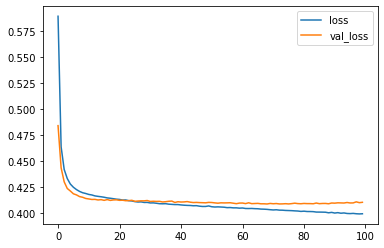

In [34]:
metrics = pd.DataFrame(history_nadam.history)
metrics[['loss', 'val_loss']].plot()

Now, we'll use the HeNormal weight initializer

In [35]:
%%time
model = Sequential()
model.add(Dense(8, activation='relu', input_shape=(45,), 
                kernel_initializer=tf.keras.initializers.HeNormal())) # hidden layer
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='nadam',
              metrics=['accuracy'])

history_wthe = model.fit(train_batches, epochs=100, validation_data=(val_prepared, y_val), verbose=0)

CPU times: user 53.9 s, sys: 3.94 s, total: 57.9 s
Wall time: 54.5 s


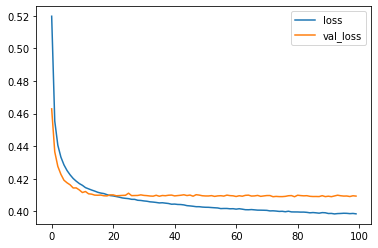

In [36]:
metrics = pd.DataFrame(history_wthe.history)
metrics[['loss', 'val_loss']].plot()

We'll try to use callback function on Keras, which is Reduce LR on Plateau. We'll turn on the verbose to see how the learning rate changed

In [37]:
%%time
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=5, min_lr=0.0001)

model = Sequential()
model.add(Dense(8, activation='relu', input_shape=(45,), 
                kernel_initializer=tf.keras.initializers.HeNormal())) # hidden layer
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='nadam',
              metrics=['accuracy'])

history_call = model.fit(train_batches, epochs=100, validation_data=(val_prepared, y_val), callbacks=[reduce_lr])

Epoch 1/100
141/141 [==============================] - 1s 5ms/step - loss: 0.5974 - accuracy: 0.6904 - val_loss: 0.5145 - val_accuracy: 0.7351 - lr: 0.0010
Epoch 2/100
141/141 [==============================] - 1s 4ms/step - loss: 0.4868 - accuracy: 0.7578 - val_loss: 0.4578 - val_accuracy: 0.7893 - lr: 0.0010
Epoch 3/100
141/141 [==============================] - 1s 4ms/step - loss: 0.4496 - accuracy: 0.7833 - val_loss: 0.4341 - val_accuracy: 0.8000 - lr: 0.0010
Epoch 4/100
141/141 [==============================] - 1s 4ms/step - loss: 0.4356 - accuracy: 0.7924 - val_loss: 0.4253 - val_accuracy: 0.8000 - lr: 0.0010
Epoch 5/100
141/141 [==============================] - 1s 4ms/step - loss: 0.4296 - accuracy: 0.7973 - val_loss: 0.4210 - val_accuracy: 0.8018 - lr: 0.0010
Epoch 6/100
141/141 [==============================] - 1s 4ms/step - loss: 0.4259 - accuracy: 0.7978 - val_loss: 0.4190 - val_accuracy: 0.7991 - lr: 0.0010
Epoch 7/100
141/141 [==============================] - 1s 4ms/st

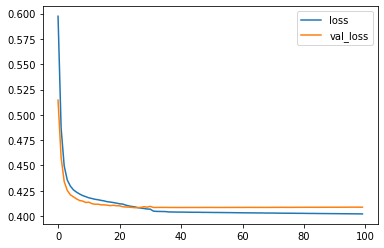

In [38]:
metrics = pd.DataFrame(history_call.history)
metrics[['loss', 'val_loss']].plot()

This is not quite the improvement, but this one's val_loss is closest so far with the loss. We'll use this as the 'best' model

In [39]:
y_pred = model.predict(test_prepared)
y_pred[y_pred < 0.5] = 0
y_pred[y_pred >= 0.5] = 1
y_pred = y_pred.squeeze()

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.62      0.51      0.56       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407



We got 0.51 recall again on the 'Churn' label, and our f1-macro stayed by 0.71 again 

## Model Inference

Next we'll try one of the data from our test label to try to infer whether the customers are churned or not

In [40]:
infer_data = X_test.iloc[-1]
infer_data = pd.DataFrame(infer_data).T
infer_data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
3984,Female,0,Yes,Yes,72,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),25.1,1857.85


Our female customer, whom is:
1. Not a senior citizen
2. Have a partner 
3. Have a family to take care (possibly is a mother)
4. Have been using the service for 72 months
5. Have phone service and multiple lines
6. Have no internet service installed
7. Have signed to a 2-year subscription
8. Billed with printed billing
9. Paid with bank transfer
10. Currently billed of 25.1 dollar per month
11. Have been billed for a total of 1857.85 dollar

In [41]:
infer_prep = full_prep.transform(infer_data)
pred_prob = model.predict(infer_prep)
if (pred_prob < 0.5):
  print('Customer stays')
else:
  print('Customer churns')

Customer stays


Our model predict that this customer will stays

## General Conclusion

1. In accordance to the EDA, the suggestion is to analyze the possible characteristic that causes churn, such as:
* High monthly cost (is it worth the service?)
* Fiber optic user (is this causing high monthly cost? Are there any trouble with fiber optic use?), 
* Month-by-month subscriber (why are they choosing to leave? Is the service considered not worth it? Is it 'too easy' for our customer to leave?)

2. The model seemingly converge 'enough' from the baseline structure (1 hidden layer with relu activation and 8 nodes). Adding the layer made it worse, and other attempt results in almost no difference.

3. Further experiment should try to preprocess the data better (discarding several features) or using other types of model